In [70]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 8E3B-8C2C

 Directory of C:\Users\lenovo\Desktop\Python codes\project 3

10/27/2024  02:48 AM    <DIR>          .
10/27/2024  02:48 AM    <DIR>          ..
10/22/2024  02:37 PM    <DIR>          .ipynb_checkpoints
07/18/2022  06:46 PM         7,965,240 gadm41_IND_0.shp
07/18/2022  06:46 PM         9,188,456 gadm41_IND_1.shp
07/18/2022  06:46 PM        13,750,356 gadm41_IND_2.shp
07/18/2022  06:46 PM        18,005,424 gadm41_IND_3.shp
10/09/2024  03:54 PM        11,473,248 IndiaPoliticalViolence(no Islands_Kashmir_Ladakh).csv
08/01/2021  01:23 PM                 5 ne_50m_admin_1_states_provinces.cpg
05/09/2022  12:46 AM           682,458 ne_50m_admin_1_states_provinces.dbf
05/09/2022  12:46 AM               143 ne_50m_admin_1_states_provinces.prj
05/09/2022  12:55 AM            40,396 ne_50m_admin_1_states_provinces.README.html
05/09/2022  12:46 AM         1,113,348 ne_50m_admin_1_states_provinces.shp
05/09/2022  12:46 AM        

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.distance import geodesic

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with your actual file paths
data = pd.read_csv('IndiaPoliticalViolence(no Islands_Kashmir_Ladakh).csv')

# Step 2: Data Preparation
# Assuming the dataset has 'latitude' and 'longitude' columns
data = data[['latitude', 'longitude']].dropna()

# Extract latitude and longitude as numpy array for clustering
locations = data[['latitude', 'longitude']].values

# Step 3: Calculate the distance matrix (if needed)
# geodesic_distance function to compute pairwise distances
# This step is optional but helps understand the distribution

def geodesic_distance_matrix(coords):
    distances = np.zeros((len(coords), len(coords)))
    for i, coord1 in enumerate(coords):
        for j, coord2 in enumerate(coords):
            distances[i, j] = geodesic(coord1, coord2).km
    return distances




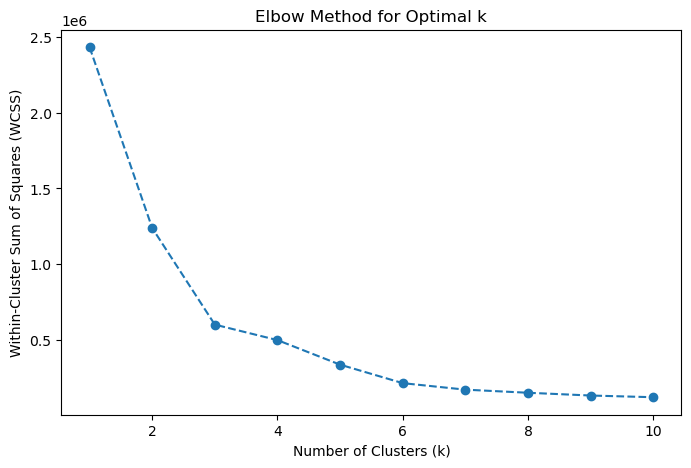

In [4]:
# Step 3: Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(locations)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

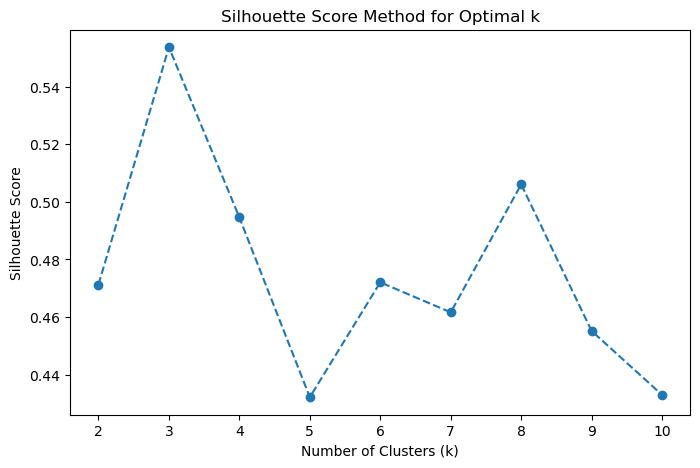

In [5]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Taking a sample of the data to speed up silhouette score calculation
sample_size = 1000  # Adjust this size if needed
locations_sample = data[['latitude', 'longitude']].sample(n=min(sample_size, len(data)), random_state=42).values

# Step 4: Calculate Silhouette Scores for k = 2 to 10 using the sample
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(locations_sample)
    score = silhouette_score(locations_sample, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores for each k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.show()


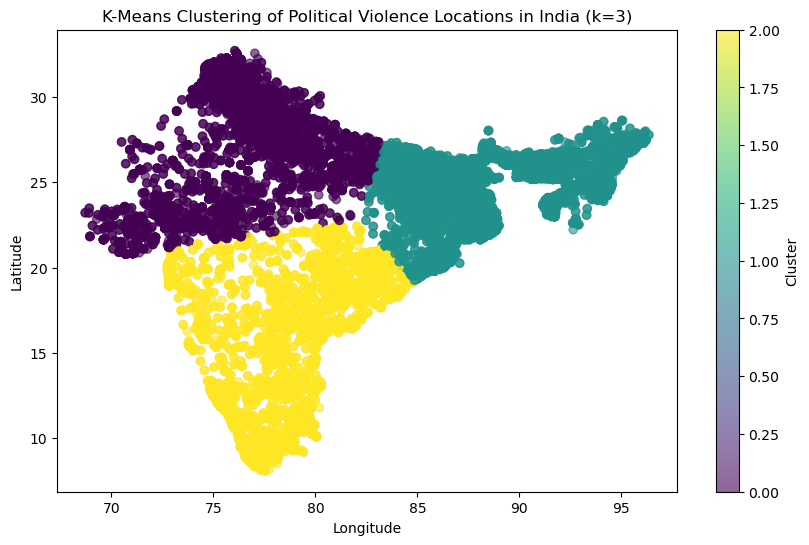

In [10]:
# Step 5: Apply K-Means Clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(locations)

# Add cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Visualize Clustering Results
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Political Violence Locations in India (k=3)')
plt.colorbar(label='Cluster')
plt.show()


In [32]:
# Load the original dataset again
data_original = pd.read_csv('IndiaPoliticalViolence(no Islands_Kashmir_Ladakh).csv')

# Display the column names in the dataset to verify we have all the columns
print(data_original.columns)


Index(['year', 'month', 'day', 'latitude', 'longitude', 'fatalities',
       'event_type', 'sub_event_type', 'source', 'notes'],
      dtype='object')


In [34]:
# Add the cluster labels from the k-means clustering to the original data
data_original['cluster'] = data['cluster']

# Display the updated dataset to verify
print(data_original.head())


   year  month  day  latitude  longitude  fatalities  \
0  2016      1    5   17.6800    83.2016           0   
1  2016      1    5   17.6800    83.2016           0   
2  2019      4   11   16.2349    80.0493           0   
3  2019      4   11   16.2349    80.0493           0   
4  2017      1   16   17.8619    82.1970           0   

                   event_type                  sub_event_type  \
0  Violence against civilians  Abduction/forced disappearance   
1  Violence against civilians  Abduction/forced disappearance   
2  Violence against civilians  Abduction/forced disappearance   
3  Violence against civilians  Abduction/forced disappearance   
4  Violence against civilians  Abduction/forced disappearance   

                        source  \
0           Chandigarh Tribune   
1           Chandigarh Tribune   
2           New Indian Express   
3           New Indian Express   
4  South Asia Terrorism Portal   

                                               notes  cluster  
0  

In [36]:
# Grouping by cluster to analyze statistics
cluster_summary = data_original.groupby('cluster').agg(
    total_incidents=('cluster', 'count'),
    total_fatalities=('fatalities', 'sum'),
    average_fatalities=('fatalities', 'mean'),
    most_common_event_type=('event_type', lambda x: x.mode()[0]),
    most_common_sub_event_type=('sub_event_type', lambda x: x.mode()[0])
).reset_index()

# Displaying summary statistics for each cluster
print(cluster_summary)


   cluster  total_incidents  total_fatalities  average_fatalities  \
0        0            10860              2702            0.248803   
1        1            17123              6281            0.366817   
2        2             8400              5043            0.600357   

  most_common_event_type most_common_sub_event_type  
0                  Riots               Mob violence  
1                  Riots               Mob violence  
2                  Riots               Mob violence  


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5760\4249453566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=data_original, palette='viridis')


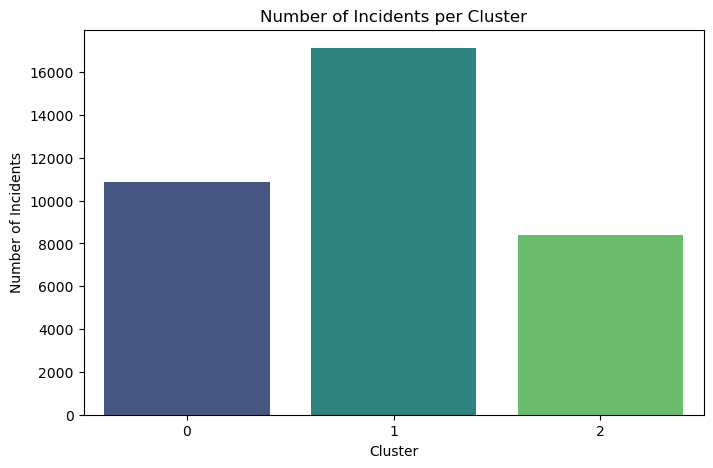

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5760\4249453566.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='fatalities', data=data_original, estimator=sum, palette='viridis')


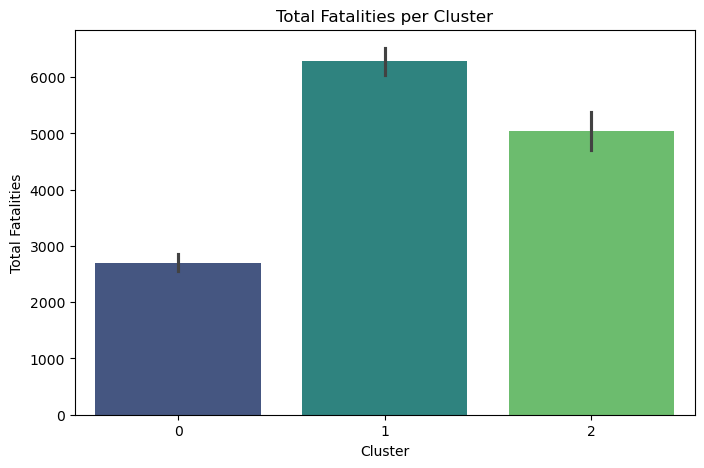

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the number of incidents per cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=data_original, palette='viridis')
plt.title('Number of Incidents per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Incidents')
plt.show()

# Plotting the total fatalities per cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='cluster', y='fatalities', data=data_original, estimator=sum, palette='viridis')
plt.title('Total Fatalities per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Fatalities')
plt.show()


In [74]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the state boundaries shapefile for India
india_states = gpd.read_file('gadm41_IND_3.shp')

# Filter to only keep India-specific boundaries (assuming there's a 'country' or 'name' column to filter)
# Modify the column name accordingly based on your shapefile's structure
india_states = india_states[india_states['NAME_0'] == 'India']  # Replace 'NAME_0' with the actual column name for filtering

# Create a GeoDataFrame from the original data
geometry = [Point(xy) for xy in zip(data_original['longitude'], data_original['latitude'])]
geo_df = gpd.GeoDataFrame(data_original, geometry=geometry)

# Plotting the clusters on a map with state boundaries for India only
fig, ax = plt.subplots(figsize=(10, 8))
india_states.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot state boundaries for India
geo_df.plot(column='cluster', ax=ax, cmap='viridis', legend=True, alpha=0.6, markersize=10)  # Plot incidents
plt.title('Geographic Distribution of Political Violence Clusters in India with State Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


KeyError: 'NAME_0'

In [54]:
# Display the column names in the india_states shapefile
print(india_states.columns)



Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)


In [56]:
# Filter to only keep India's boundaries (assuming 'name' contains information about the region)
india_states = india_states[india_states['name'] == 'India']  # Using 'name' column to filter


In [78]:
# Check how many records are present after filtering
print(india_states.shape)


(2347, 17)


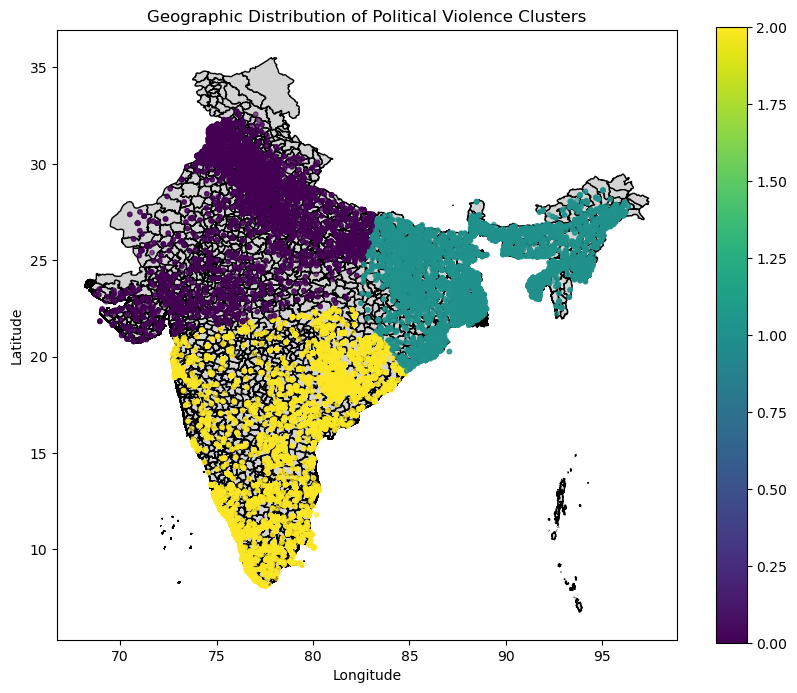

In [76]:
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame from the original data
geometry = [Point(xy) for xy in zip(data_original['longitude'], data_original['latitude'])]
geo_df = gpd.GeoDataFrame(data_original, geometry=geometry)

# Plotting the clusters on a map without filtering the state boundaries
fig, ax = plt.subplots(figsize=(10, 8))
india_states.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot state boundaries (possibly global)
geo_df.plot(column='cluster', ax=ax, cmap='viridis', legend=True, alpha=0.6, markersize=10)  # Plot incidents
plt.title('Geographic Distribution of Political Violence Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [66]:
# Display the first 5 rows to inspect available data
print(india_states.head())

# Check for valid geometries
print(india_states.geometry.isna().sum())  # Should be 0 if all geometries are valid


Empty GeoDataFrame
Columns: [featurecla, scalerank, adm1_code, diss_me, iso_3166_2, wikipedia, iso_a2, adm0_sr, name, name_alt, name_local, type, type_en, code_local, code_hasc, note, hasc_maybe, region, region_cod, provnum_ne, gadm_level, check_me, datarank, abbrev, postal, area_sqkm, sameascity, labelrank, name_len, mapcolor9, mapcolor13, fips, fips_alt, woe_id, woe_label, woe_name, latitude, longitude, sov_a3, adm0_a3, adm0_label, admin, geonunit, gu_a3, gn_id, gn_name, gns_id, gns_name, gn_level, gn_region, gn_a1_code, region_sub, sub_code, gns_level, gns_lang, gns_adm1, gns_region, min_label, max_label, min_zoom, wikidataid, name_ar, name_bn, name_de, name_en, name_es, name_fr, name_el, name_hi, name_hu, name_id, name_it, name_ja, name_ko, name_nl, name_pl, name_pt, name_ru, name_sv, name_tr, name_vi, name_zh, ne_id, name_he, name_uk, name_ur, name_fa, name_zht, FCLASS_ISO, FCLASS_US, FCLASS_FR, FCLASS_RU, FCLASS_ES, FCLASS_CN, FCLASS_TW, FCLASS_IN, FCLASS_NP, FCLASS_PK, FCLASS_DE

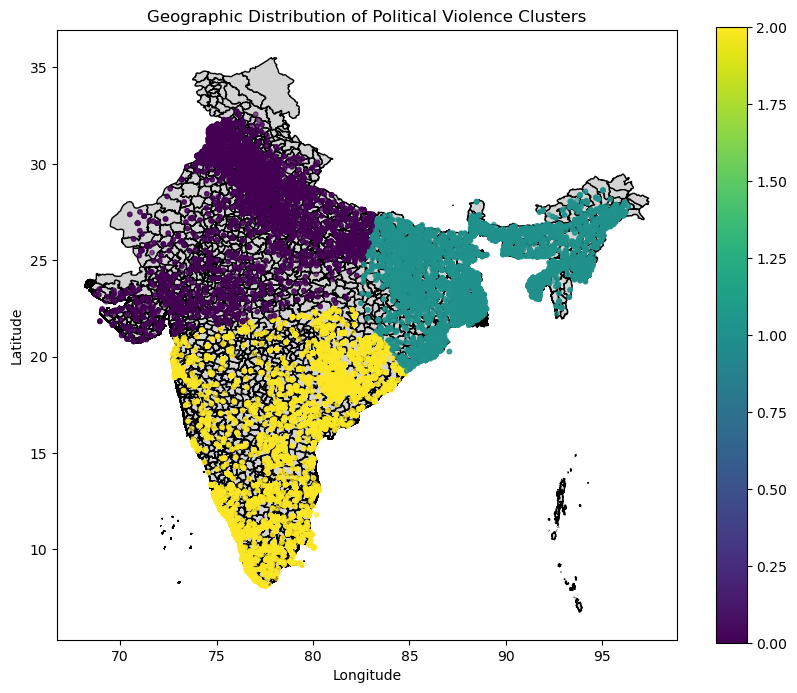

In [86]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the shapefile for India's state boundaries
# Make sure you have the path correct for the shapefile you downloaded
india_states = gpd.read_file('gadm41_IND_3.shp')

# Create a GeoDataFrame from the original political violence data
geometry = [Point(xy) for xy in zip(data_original['longitude'], data_original['latitude'])]
geo_df = gpd.GeoDataFrame(data_original, geometry=geometry)

# Plotting the clusters on a map with state boundaries
fig, ax = plt.subplots(figsize=(10, 8))
india_states.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot state boundaries
geo_df.plot(column='cluster', ax=ax, cmap='viridis', legend=True, alpha=0.6, markersize=10)  # Plot incidents
plt.title('Geographic Distribution of Political Violence Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as an image file (e.g., PNG)
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/geographic_clusters.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5760\722753784.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Cluster', y='Count', palette='viridis')


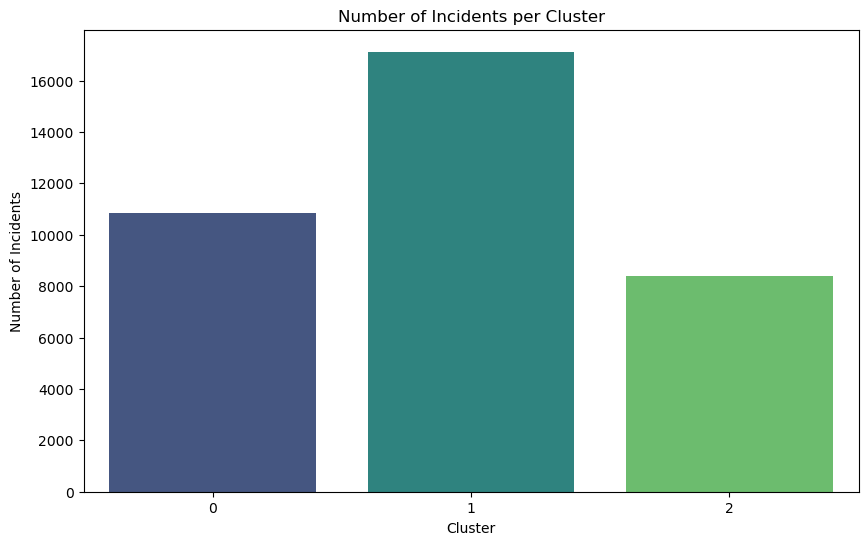

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the data is in DataFrame format for easier handling
# Number of incidents per cluster
cluster_counts = data_original['cluster'].value_counts().sort_index()

# Convert cluster_counts to a DataFrame for easier use with hue
cluster_data = pd.DataFrame({'Cluster': cluster_counts.index, 'Count': cluster_counts.values})

# Plotting the number of incidents per cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_data, x='Cluster', y='Count', palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Cluster')

# Save the plot as an image file before showing it
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/number_of_incidents_per_cluster.png', bbox_inches='tight', dpi=300)

# Now show the plot
plt.show()


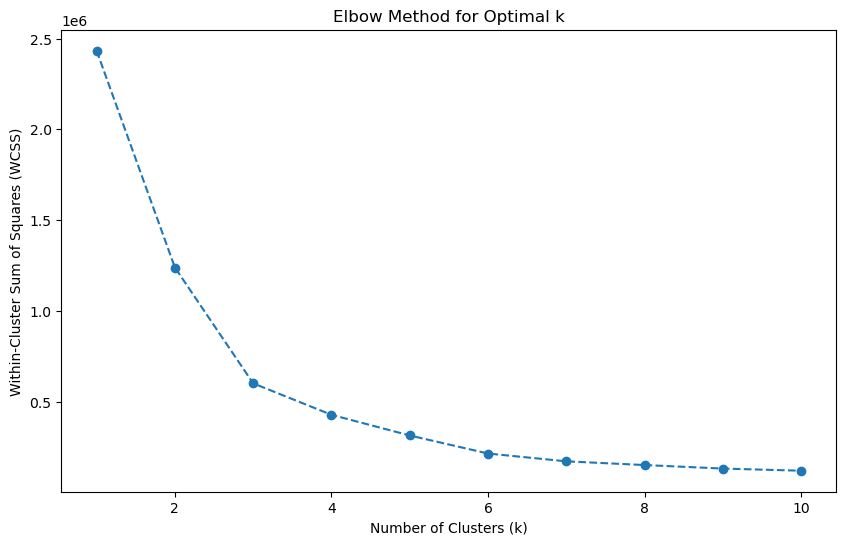

In [96]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Extracting latitude and longitude for clustering
X = data_original[['latitude', 'longitude']].values

# Calculating WCSS (Within-Cluster Sum of Squares) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/elbow_method.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5760\3297606744.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fatalities_per_cluster, x='cluster', y='fatalities', palette='viridis')


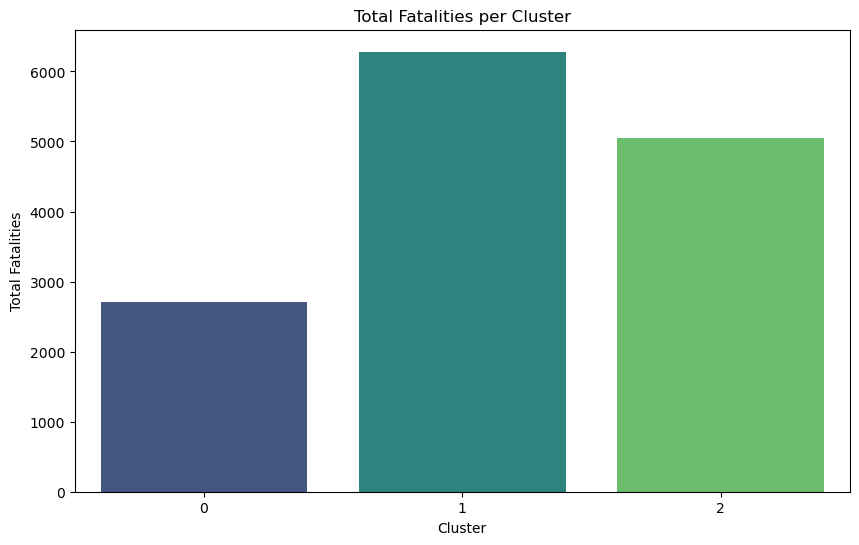

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Total fatalities per cluster
fatalities_per_cluster = data_original.groupby('cluster')['fatalities'].sum().reset_index()

# Plotting the total fatalities per cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=fatalities_per_cluster, x='cluster', y='fatalities', palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities per Cluster')

# Save the plot as an image file
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/total_fatalities_per_cluster.png', bbox_inches='tight', dpi=300)

# Now show the plot
plt.show()


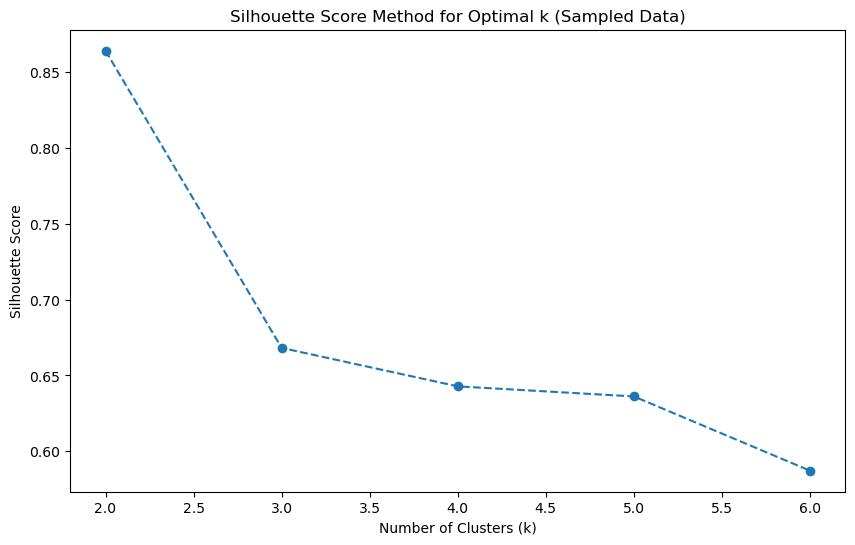

In [102]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Extracting a sample of the dataset for faster computation
X_sample = data_original[['latitude', 'longitude']].values[:1000]

# Calculating silhouette scores for a smaller range of k values
silhouette_scores = []
for k in range(2, 7):  # Reduced range for k
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_sample)
    silhouette_avg = silhouette_score(X_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Score for Optimal k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k (Sampled Data)')
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/silhouette_score.png', bbox_inches='tight', dpi=300)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5760\1341855798.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_original, x=data_original['date'].dt.year, palette='viridis')


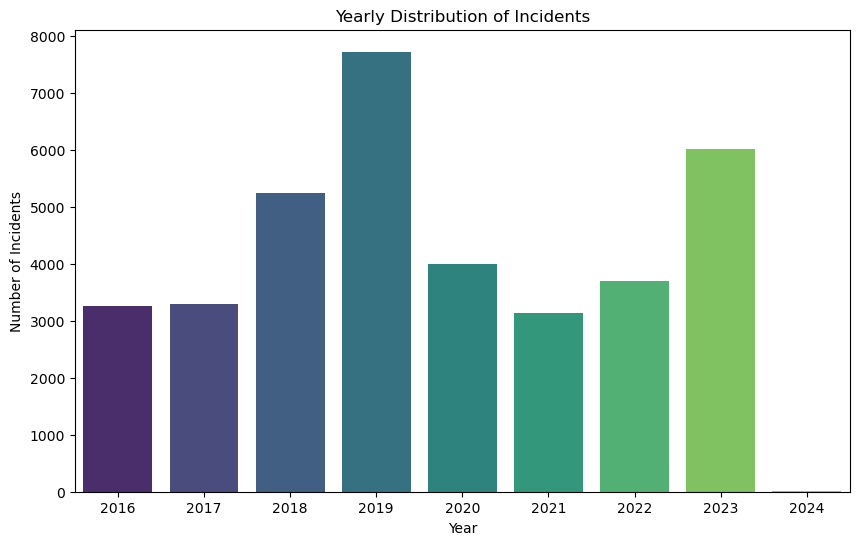

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5760\1341855798.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_original, x=data_original['date'].dt.month, palette='viridis')


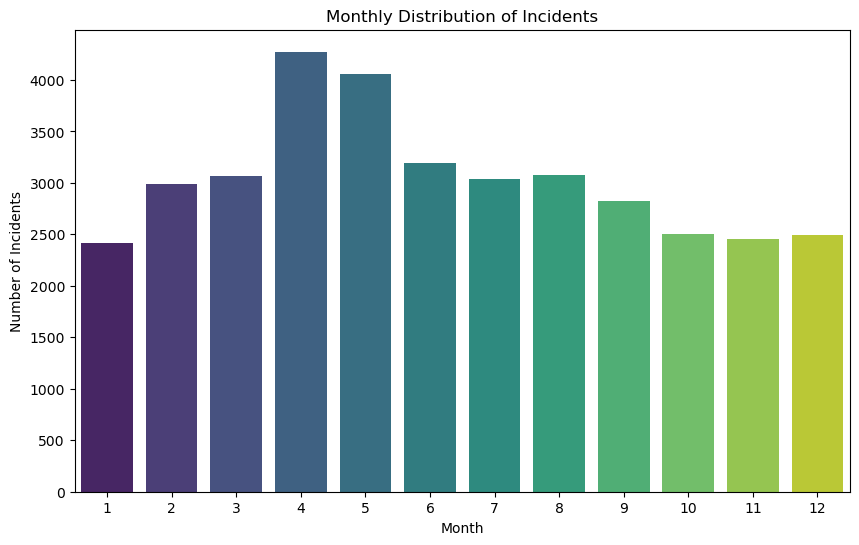

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converting year and month columns to datetime format for analysis
data_original['date'] = pd.to_datetime(data_original[['year', 'month', 'day']], errors='coerce')

# Yearly distribution of incidents
plt.figure(figsize=(10, 6))
sns.countplot(data=data_original, x=data_original['date'].dt.year, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Yearly Distribution of Incidents')
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/yearly_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

# Monthly distribution of incidents
plt.figure(figsize=(10, 6))
sns.countplot(data=data_original, x=data_original['date'].dt.month, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Monthly Distribution of Incidents')
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/monthly_distribution.png', bbox_inches='tight', dpi=300)
plt.show()


In [106]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from geopy.distance import geodesic

# Load the dataset
data = pd.read_csv('IndiaPoliticalViolence(no Islands_Kashmir_Ladakh).csv')

# Drop rows with missing latitude or longitude
coordinates = data[['latitude', 'longitude']].dropna()

# Step 2: Perform k-means clustering to determine the clusters
kmeans = KMeans(n_clusters=3, random_state=42)
coordinates['cluster'] = kmeans.fit_predict(coordinates)

# Calculate the centroids of each cluster
centroids = kmeans.cluster_centers_

# Step 3: Calculate geodesic distance from each incident to its cluster centroid
def calculate_geodesic_distance(row):
    incident_location = (row['latitude'], row['longitude'])
    centroid_location = (centroids[int(row['cluster'])][0], centroids[int(row['cluster'])][1])
    return geodesic(incident_location, centroid_location).km

coordinates['geodesic_distance'] = coordinates.apply(calculate_geodesic_distance, axis=1)

# Display the first few rows to verify
print(coordinates.head())


   latitude  longitude  cluster  geodesic_distance
0   17.6800    83.2016        2         478.054931
1   17.6800    83.2016        2         478.054931
2   16.2349    80.0493        2         120.871521
3   16.2349    80.0493        2         120.871521
4   17.8619    82.1970        2         385.694040


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5760\3227658167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='geodesic_distance', data=coordinates, palette='viridis')


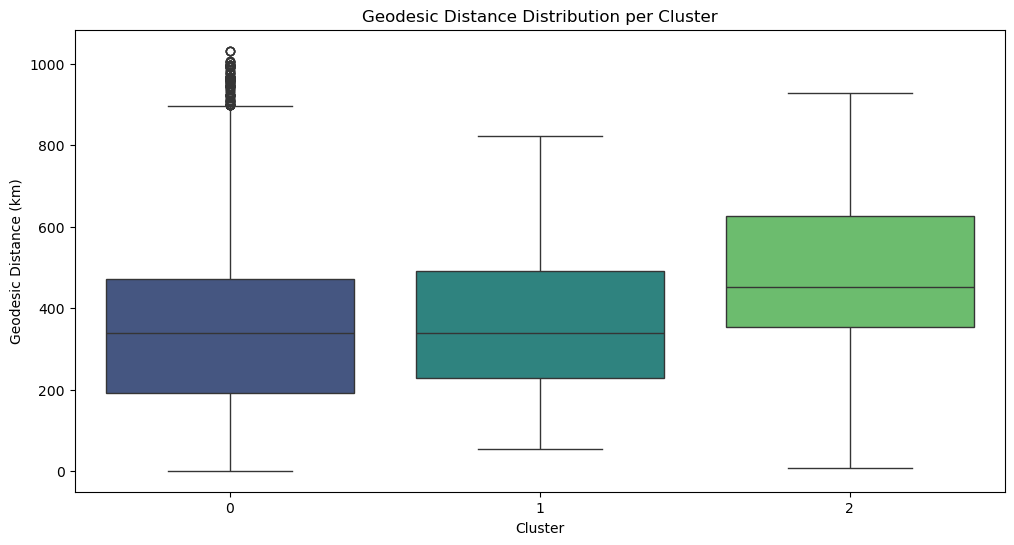

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of geodesic distances for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='geodesic_distance', data=coordinates, palette='viridis')

# Set plot title and labels
plt.title('Geodesic Distance Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Geodesic Distance (km)')

# Save the figure
plt.savefig('C:/Users/lenovo/Desktop/Python codes/project 3/geodesic_distance_distribution_india.png', bbox_inches='tight', dpi=300)
plt.show()
